In [2]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *
from ctrace.problem_label import *
from ctrace.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
#
df_mont = pd.read_csv(PROJECT_ROOT / 'output/run_6hC6y/results.csv')
df_albe = pd.read_csv(PROJECT_ROOT / 'output/run_5mxQv/results.csv')
df_mont.head()

,G,budget,policy,transmission_rate,transmission_known,compliance_rate,compliance_known,discovery_rate,snitch_rate,from_cache,agent,trial_id,infection_count,infections_step
0,montgomery,400,none,0.05,True,0.8,True,1,1,c7.json,segmented_greedy,1,39482,"[0, 10, 7, 12, 20, 52, 80, 160, 269, 477, 642,..."
1,montgomery,400,none,0.05,True,0.8,True,1,1,c7.json,segmented_greedy,0,39629,"[0, 10, 7, 12, 20, 52, 80, 160, 269, 468, 630,..."
2,montgomery,400,none,0.05,True,0.8,True,1,1,c7.json,segmented_greedy,3,39446,"[0, 10, 7, 12, 20, 52, 80, 160, 269, 508, 681,..."
3,montgomery,400,none,0.05,True,0.8,True,1,1,c7.json,segmented_greedy,2,39484,"[0, 10, 7, 12, 20, 52, 80, 160, 269, 497, 688,..."
4,montgomery,400,none,0.05,True,0.8,True,1,1,c7.json,segmented_greedy,4,39330,"[0, 10, 7, 12, 20, 52, 80, 160, 269, 448, 704,..."


In [19]:
df_albe

,G,budget,policy,transmission_rate,transmission_known,compliance_rate,compliance_known,discovery_rate,snitch_rate,from_cache,agent,trial_id,infection_count,infections_step
0,cville,720,none,0.05,True,-1,False,1,1,b5.json,segmented_greedy,4,72630,"[0, 10, 10, 22, 41, 116, 317, 974, 2052, 3414,..."
1,cville,760,none,0.05,True,-1,False,1,1,b5.json,segmented_greedy,5,73374,"[0, 10, 10, 22, 41, 116, 317, 945, 2134, 3513,..."
2,cville,740,none,0.05,True,-1,False,1,1,b5.json,segmented_greedy,5,73101,"[0, 10, 10, 22, 41, 116, 317, 929, 2104, 3436,..."
3,cville,760,none,0.05,True,-1,False,1,1,b5.json,segmented_greedy,3,72931,"[0, 10, 10, 22, 41, 116, 317, 935, 2099, 3664,..."
4,cville,780,none,0.05,True,-1,False,1,1,b5.json,segmented_greedy,0,73171,"[0, 10, 10, 22, 41, 116, 317, 907, 1982, 3348,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,cville,2260,none,0.05,True,-1,False,1,1,b5.json,segmented_greedy,3,67731,"[0, 10, 10, 22, 41, 116, 317, 904, 1541, 2222,..."
776,cville,2260,none,0.05,True,-1,False,1,1,b5.json,segmented_greedy,8,67928,"[0, 10, 10, 22, 41, 116, 317, 889, 1511, 2322,..."
777,cville,2260,none,0.05,True,-1,False,1,1,b5.json,segmented_greedy,6,67758,"[0, 10, 10, 22, 41, 116, 317, 968, 1650, 2377,..."
778,cville,2260,none,0.05,True,-1,False,1,1,b5.json,segmented_greedy,2,68042,"[0, 10, 10, 22, 41, 116, 317, 931, 1665, 2355,..."


ValueError: Could not interpret value `infected` for parameter `y`

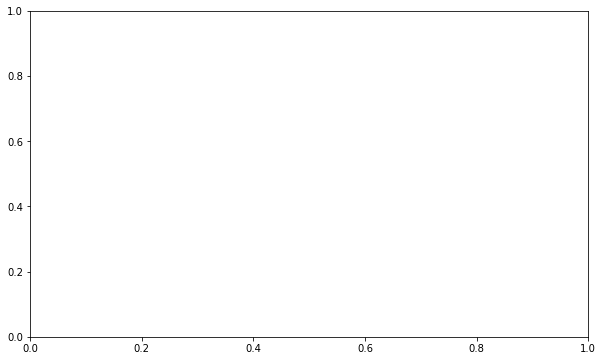

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax = {(0,0): ax}

ax0 = sns.lineplot(data=df, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 0])
ax0.get_legend().remove()

ax[0, 0].set_xlabel("Budget")
ax[0, 0].set_ylabel("Total Infections (% of Population)")
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].text(680, 41.5, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].text(850, 41.5, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)

fig.legend(['Random Isolation','Eigenvector Centrality','DepRound','DegGreedy','No Intervention'],title='Algorithm for MinExposed',loc = "lower center", ncol = 5, bbox_to_anchor = (0.55, -0.1), prop={'size':10})
